In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [372]:
csv_path = "/Users/danishmir/desktop/737-project/Analysis/oneHot_withCATEGORY.csv"

In [373]:
df=pd.read_csv(csv_path)

In [374]:
df.shape

(961946, 14)

In [375]:
df=df.sample(frac=0.3, random_state=1)# creating random sample from df with 10% data entreis, this is to reduce computation as my machine is unable to handle the data

In [376]:
df.shape

(288584, 14)

In [377]:
df.head(5)

,Unnamed: 0,X,DURATION,HOURLY_WAGE,WAGE_RATE_OF_PAY_FROM_HOUR,WILLFUL_VIOLATOR,OCCUPATION,AGENT_PRESENT_0.0,AGENT_PRESENT_1.0,CASE_STATUS_0.0,CASE_STATUS_1.0,WAGE_RATE_OF_PAY_FROM_HOUR_RANGE,DURATION_RANGE,HOURLY_WAGE_RANGE
759346,759347,759346,6,47.4,47.40,4,computer occupations,1,0,0,1,"(40,50]","(0,10]","(40,50]"
356932,356933,356932,6,20.9,20.94,35,Others,1,0,0,1,"(20,30]","(0,10]","(20,30]"
620091,620092,620091,4,35.7,36.60,9,Financial Occupation,0,1,0,1,"(30,40]","(0,10]","(30,40]"
663836,663837,663836,7,30.6,34.10,49,computer occupations,1,0,0,1,"(30,40]","(0,10]","(30,40]"
257533,257534,257533,6,33.9,34.40,35,computer occupations,0,1,0,1,"(30,40]","(0,10]","(30,40]"


In [378]:
df['AGENT_PRESENT_0.0'].replace(0, "Absent", inplace=True)#un-encode AGENT_PRESENT

In [379]:
df["AGENT_PRESENT_0.0"].replace(1, "Present", inplace=True)#un-encode AGENT_PRESENT

In [380]:
df.head(5)

,Unnamed: 0,X,DURATION,HOURLY_WAGE,WAGE_RATE_OF_PAY_FROM_HOUR,WILLFUL_VIOLATOR,OCCUPATION,AGENT_PRESENT_0.0,AGENT_PRESENT_1.0,CASE_STATUS_0.0,CASE_STATUS_1.0,WAGE_RATE_OF_PAY_FROM_HOUR_RANGE,DURATION_RANGE,HOURLY_WAGE_RANGE
759346,759347,759346,6,47.4,47.40,4,computer occupations,Present,0,0,1,"(40,50]","(0,10]","(40,50]"
356932,356933,356932,6,20.9,20.94,35,Others,Present,0,0,1,"(20,30]","(0,10]","(20,30]"
620091,620092,620091,4,35.7,36.60,9,Financial Occupation,Absent,1,0,1,"(30,40]","(0,10]","(30,40]"
663836,663837,663836,7,30.6,34.10,49,computer occupations,Present,0,0,1,"(30,40]","(0,10]","(30,40]"
257533,257534,257533,6,33.9,34.40,35,computer occupations,Absent,1,0,1,"(30,40]","(0,10]","(30,40]"


In [381]:
#df['WORKSITE_STATE']=df['WORKSITE_STATE'].astype('category')

In [382]:
#df['WILLFUL_VIOLATOR']=df['WILLFUL_VIOLATOR'].astype('category')

In [383]:
#df['EMPLOYER_STATE']=df['EMPLOYER_STATE'].astype('category')

In [384]:
#df['CASE_STATUS']=df['CASE_STATUS'].astype('category')

In [385]:
#df['AGENT_PRESENT']=df['AGENT_PRESENT'].astype('category')

In [386]:
df.dtypes

Unnamed: 0                            int64
X                                     int64
DURATION                              int64
HOURLY_WAGE                         float64
WAGE_RATE_OF_PAY_FROM_HOUR          float64
WILLFUL_VIOLATOR                      int64
OCCUPATION                           object
AGENT_PRESENT_0.0                    object
AGENT_PRESENT_1.0                     int64
CASE_STATUS_0.0                       int64
CASE_STATUS_1.0                       int64
WAGE_RATE_OF_PAY_FROM_HOUR_RANGE     object
DURATION_RANGE                       object
HOURLY_WAGE_RANGE                    object
dtype: object

In [387]:
#lets select some features which we want to use for classifier

In [388]:
cdf = df[['DURATION', 'HOURLY_WAGE', 'AGENT_PRESENT_0.0', 'AGENT_PRESENT_1.0', 'DURATION_RANGE','HOURLY_WAGE_RANGE','CASE_STATUS_0.0', 'CASE_STATUS_1.0']]

In [389]:
cdf['AGENT_PRESENT_0.0']=cdf['AGENT_PRESENT_0.0'].astype('category')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [390]:
cdf.head(5)

,DURATION,HOURLY_WAGE,AGENT_PRESENT_0.0,AGENT_PRESENT_1.0,DURATION_RANGE,HOURLY_WAGE_RANGE,CASE_STATUS_0.0,CASE_STATUS_1.0
759346,6,47.4,Present,0,"(0,10]","(40,50]",0,1
356932,6,20.9,Present,0,"(0,10]","(20,30]",0,1
620091,4,35.7,Absent,1,"(0,10]","(30,40]",0,1
663836,7,30.6,Present,0,"(0,10]","(30,40]",0,1
257533,6,33.9,Absent,1,"(0,10]","(30,40]",0,1


In [391]:
cdf.dtypes

DURATION                int64
HOURLY_WAGE           float64
AGENT_PRESENT_0.0    category
AGENT_PRESENT_1.0       int64
DURATION_RANGE         object
HOURLY_WAGE_RANGE      object
CASE_STATUS_0.0         int64
CASE_STATUS_1.0         int64
dtype: object

In [392]:
#Decision Trees and Random Forests.

In [393]:
cdf.columns

Index(['DURATION', 'HOURLY_WAGE', 'AGENT_PRESENT_0.0', 'AGENT_PRESENT_1.0',
       'DURATION_RANGE', 'HOURLY_WAGE_RANGE', 'CASE_STATUS_0.0',
       'CASE_STATUS_1.0'],
      dtype='object')

In [394]:
#setting up decision tree
from sklearn.model_selection import train_test_split
X=np.array(cdf[['DURATION', "HOURLY_WAGE", 'CASE_STATUS_0.0', 'CASE_STATUS_1.0']])
y=cdf['AGENT_PRESENT_0.0']
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.3,random_state=6)

In [395]:
import matplotlib.pyplot as plt
#sns.boxplot(x="AGENT_PRESENT_0.0", y="DURATION", data=df)
#plt.savefig('ac.png')

In [396]:
print(X_trainset.shape)
print(y_trainset.shape)

(202008, 4)
(202008,)


In [397]:
print(X_testset.shape)
print(y_testset.shape)

(86576, 4)
(86576,)


In [398]:
#modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
AGENT_PRESENT_tree=DecisionTreeClassifier(criterion="entropy", max_depth=4) 

In [399]:
#conda upgrade scikit-learn

In [400]:
from sklearn.tree.export import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [401]:
AGENT_PRESENT_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

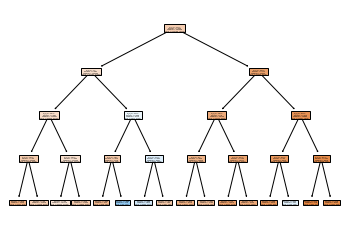

In [402]:
AGENT_PRESENT_tree.fit(X_trainset,y_trainset)
plot_tree(AGENT_PRESENT_tree, filled = True)
plt.savefig('1avc.JPEG', dpi = 355, quality = 95, orientation = 'landscape', transparent=False)
fig1 = plt.gcf()
plt.show()

In [403]:
#from sklearn import graphviz

In [404]:
#Tpng AGENT_PRESENT_tree.dot tree.png 

In [405]:
#from sklearn.tree.export import export_text
#r = export_text(CASE_STATUS_tree, feature_names=cdf['CASE_STATUS_0.0'])
#print(r)

In [406]:
#Prediction
predTree = AGENT_PRESENT_tree.predict(X_testset)
print(predTree[0:5])
print(y_testset[0:5])

['Absent' 'Absent' 'Absent' 'Absent' 'Absent']
569824     Absent
84152      Absent
26099     Present
468201     Absent
546271     Absent
Name: AGENT_PRESENT_0.0, dtype: category
Categories (2, object): [Absent, Present]


In [407]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy:", metrics.accuracy_score(y_testset,predTree))

DecisionTree's Accuracy: 0.6259009425244871


Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [410]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [411]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, predTree, labels=["Absent", "Present"]))

[[52184  1469]
 [30919  2004]]


Normalized confusion matrix
[[0.97 0.03]
 [0.94 0.06]]


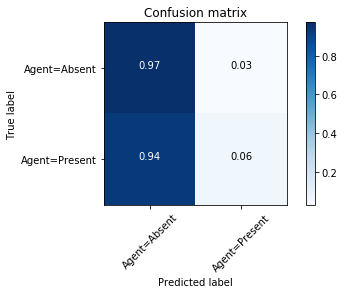

In [412]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=["Absent", "Present"])
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Agent=Absent','Agent=Present'],normalize= True,  title='Confusion matrix')

In [415]:
#pip install pydot

In [417]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [417]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [422]:
bdt_real.fit(X_trainset, y_trainset)
bdt_discrete.fit(X_trainset, y_trainset)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [426]:
print("Real DecisionTree's Accuracy:", metrics.accuracy_score(real_test_predict, y_testset))

Real DecisionTree's Accuracy: 0.6395536869340233


In [427]:
print("ADAboost DecisionTree's Accuracy:", metrics.accuracy_score(discrete_train_predict, y_testset))

ADAboost DecisionTree's Accuracy: 0.6294816115320643
